In [ ]:
import pandas as pd #for saving data to csv
import requests
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os

In [ ]:
load_dotenv()

In [ ]:
api_key = os.getenv("TIINGO_API_KEY")
ticker = "AAPL"
url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')

In [5]:
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Token {api_key}'
}

ticker = "AAPL"
url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices"

params = {
    'startDate': start_date,
    'endDate': end_date,
    'format': 'csv',
    'resampleFreq': 'daily'
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    with open(f"{ticker}_tiingo_data_{start_date}_to_{end_date}.csv", "wb") as file:
        file.write(response.content)
    print(f"Data saved to {ticker}_tiingo_data_{start_date}_to_{end_date}.csv")
else:
    print(f"Error {response.status_code}: {response.text}")


Data saved to AAPL_tiingo_data_2020-05-08_to_2025-05-07.csv


In [6]:
file = f"{ticker}_tiingo_data_{start_date}_to_{end_date}.csv"

In [7]:
df = pd.read_csv(file)

In [8]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-05-08,310.13,310.35,304.2900,305.64,33511985,75.464926,75.518460,74.043860,74.372360,134047940,0.82,1.0
1,2020-05-11,315.01,317.05,307.2400,308.10,36486561,76.652392,77.148792,74.761693,74.970960,145946244,0.00,1.0
2,2020-05-12,311.41,319.69,310.9100,317.83,40575263,75.776393,77.791192,75.654726,77.338592,162301052,0.00,1.0
3,2020-05-13,307.65,315.95,303.2100,312.15,50155639,74.861460,76.881125,73.781060,75.956459,200622556,0.00,1.0
4,2020-05-14,309.54,309.79,301.5300,304.51,39732269,75.321360,75.382193,73.372261,74.097394,158929076,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,2025-04-30,212.50,213.58,206.6705,209.30,52286454,212.500000,213.580000,206.670500,209.300000,52286454,0.00,1.0
1251,2025-05-01,213.32,214.56,208.9000,209.08,57365675,213.320000,214.560000,208.900000,209.080000,57365675,0.00,1.0
1252,2025-05-02,205.35,206.99,202.1600,206.09,101010621,205.350000,206.990000,202.160000,206.090000,101010621,0.00,1.0
1253,2025-05-05,198.89,204.10,198.2100,203.10,69018452,198.890000,204.100000,198.210000,203.100000,69018452,0.00,1.0


In [9]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2020-05-08,310.13,310.35,304.29,305.64,33511985,75.464926,75.518460,74.043860,74.372360,134047940,0.82,1.0
1,2020-05-11,315.01,317.05,307.24,308.10,36486561,76.652392,77.148792,74.761693,74.970960,145946244,0.00,1.0
2,2020-05-12,311.41,319.69,310.91,317.83,40575263,75.776393,77.791192,75.654726,77.338592,162301052,0.00,1.0
3,2020-05-13,307.65,315.95,303.21,312.15,50155639,74.861460,76.881125,73.781060,75.956459,200622556,0.00,1.0
4,2020-05-14,309.54,309.79,301.53,304.51,39732269,75.321360,75.382193,73.372261,74.097394,158929076,0.00,1.0


In [10]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1250,2025-04-30,212.50,213.58,206.6705,209.30,52286454,212.50,213.58,206.6705,209.30,52286454,0.0,1.0
1251,2025-05-01,213.32,214.56,208.9000,209.08,57365675,213.32,214.56,208.9000,209.08,57365675,0.0,1.0
1252,2025-05-02,205.35,206.99,202.1600,206.09,101010621,205.35,206.99,202.1600,206.09,101010621,0.0,1.0
1253,2025-05-05,198.89,204.10,198.2100,203.10,69018452,198.89,204.10,198.2100,203.10,69018452,0.0,1.0
1254,2025-05-06,198.51,200.65,197.0200,198.21,51216482,198.51,200.65,197.0200,198.21,51216482,0.0,1.0


In [11]:
df1 = df.reset_index()["close"]

In [12]:
df1

,close
0,310.13
1,315.01
2,311.41
3,307.65
4,309.54
...,...
1250,212.50
1251,213.32
1252,205.35
1253,198.89


In [13]:
import matplotlib.pyplot as plt

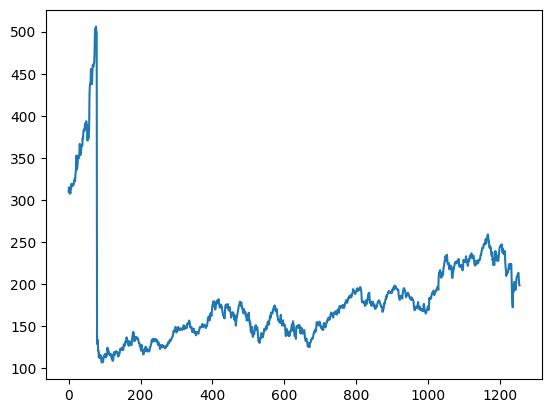

In [14]:
plt.plot(df1)

In [15]:
###We will first divide data before scaling so that we wont cause leakage

In [16]:
import numpy as np

In [17]:
df2 = np.array(df1).reshape(-1, 1)

In [18]:
#Dividing Data into training and testing
#Assuming starting 65% is taken as traininf and 35% for testing

In [19]:
train_siz = int(len(df2)*0.65)
test_siz = len(df2) - train_siz

In [20]:
train_siz

815

In [21]:
test_siz

440

In [22]:
Train_DS = df2[:train_siz]
Test_DS = df2[train_siz:]

In [23]:
###Since We are using LSTM which are sensitive to scale of data so we will map it between 0 and 1

In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [26]:
Train_DS_scaled = scaler.fit_transform(Train_DS)

In [27]:
Test_DS_scaled = scaler.transform(Test_DS)

In [28]:
Train_DS

array([[310.13 ],
       [315.01 ],
       [311.41 ],
       [307.65 ],
       [309.54 ],
       [307.71 ],
       [314.96 ],
       [313.14 ],
       [319.23 ],
       [316.85 ],
       [318.89 ],
       [316.73 ],
       [318.11 ],
       [318.25 ],
       [317.94 ],
       [321.85 ],
       [323.34 ],
       [325.12 ],
       [322.32 ],
       [331.5  ],
       [333.46 ],
       [343.99 ],
       [352.84 ],
       [335.9  ],
       [338.8  ],
       [342.99 ],
       [352.08 ],
       [351.59 ],
       [351.73 ],
       [349.72 ],
       [358.87 ],
       [366.53 ],
       [360.06 ],
       [364.84 ],
       [353.63 ],
       [361.78 ],
       [364.8  ],
       [364.11 ],
       [364.11 ],
       [373.85 ],
       [372.69 ],
       [381.37 ],
       [383.01 ],
       [383.68 ],
       [381.91 ],
       [388.23 ],
       [390.9  ],
       [386.09 ],
       [385.31 ],
       [393.43 ],
       [388.   ],
       [389.09 ],
       [371.38 ],
       [370.46 ],
       [379.24 ],
       [37

In [29]:
Test_DS

array([[181.99],
       [178.85],
       [179.8 ],
       [178.19],
       [177.97],
       [177.79],
       [179.46],
       [177.45],
       [176.57],
       [174.  ],
       [174.49],
       [175.84],
       [177.23],
       [181.12],
       [176.38],
       [178.61],
       [180.19],
       [184.12],
       [187.65],
       [187.87],
       [189.46],
       [189.7 ],
       [182.91],
       [177.56],
       [178.18],
       [179.36],
       [176.3 ],
       [174.21],
       [175.74],
       [175.01],
       [177.97],
       [179.07],
       [175.49],
       [173.93],
       [174.79],
       [176.08],
       [171.96],
       [170.43],
       [170.69],
       [171.21],
       [173.75],
       [172.4 ],
       [173.66],
       [174.91],
       [177.49],
       [178.99],
       [178.39],
       [179.8 ],
       [180.71],
       [178.85],
       [178.72],
       [177.15],
       [175.84],
       [175.46],
       [172.88],
       [173.  ],
       [173.44],
       [171.1 ],
       [166.89

In [30]:
Train_DS_scaled

array([[5.09179712e-01],
       [5.21402630e-01],
       [5.12385723e-01],
       [5.02968065e-01],
       [5.07701941e-01],
       [5.03118347e-01],
       [5.21277395e-01],
       [5.16718848e-01],
       [5.31972448e-01],
       [5.26011271e-01],
       [5.31120852e-01],
       [5.25710708e-01],
       [5.29167188e-01],
       [5.29517846e-01],
       [5.28741390e-01],
       [5.38534753e-01],
       [5.42266750e-01],
       [5.46725110e-01],
       [5.39711960e-01],
       [5.62705072e-01],
       [5.67614277e-01],
       [5.93988729e-01],
       [6.16155291e-01],
       [5.73725736e-01],
       [5.80989355e-01],
       [5.91484033e-01],
       [6.14251722e-01],
       [6.13024421e-01],
       [6.13375078e-01],
       [6.08340639e-01],
       [6.31258610e-01],
       [6.50444584e-01],
       [6.34239198e-01],
       [6.46211647e-01],
       [6.18134001e-01],
       [6.38547276e-01],
       [6.46111459e-01],
       [6.44383219e-01],
       [6.44383219e-01],
       [6.68778961e-01],


In [31]:
Test_DS_scaled

array([[0.18822793],
       [0.18036318],
       [0.18274264],
       [0.17871008],
       [0.17815905],
       [0.1777082 ],
       [0.18189105],
       [0.17685661],
       [0.17465247],
       [0.1682154 ],
       [0.16944271],
       [0.17282405],
       [0.17630557],
       [0.18604884],
       [0.17417658],
       [0.17976205],
       [0.18371947],
       [0.19356293],
       [0.20240451],
       [0.20295554],
       [0.20693801],
       [0.20753914],
       [0.19053225],
       [0.17713212],
       [0.17868503],
       [0.18164058],
       [0.17397621],
       [0.16874139],
       [0.17257358],
       [0.17074515],
       [0.17815905],
       [0.18091421],
       [0.1719474 ],
       [0.16804008],
       [0.17019411],
       [0.17342517],
       [0.16310582],
       [0.15927364],
       [0.15992486],
       [0.1612273 ],
       [0.16758923],
       [0.16420789],
       [0.16736381],
       [0.17049468],
       [0.17695679],
       [0.18071384],
       [0.17921102],
       [0.182

In [32]:
#creating dataset based on time steps
#as for Time Series Analysis data depends on previous values so timesteps will tell how many values will be considered to predict the next one

In [33]:
def create_dataset(dataset, timesteps):
    dataX = []
    dataY = []
    for i in range(0, len(dataset) - timesteps - 1):
        a = dataset[i:(i+timesteps), 0]
        dataX.append(a)
        dataY.append(dataset[i+timesteps, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
#timesteps
timeSteps = 100
x_train, y_train = create_dataset(Train_DS_scaled, timeSteps)
X_test, Y_test = create_dataset(Test_DS_scaled, timeSteps)

In [35]:
print(X_test.shape), print(Y_test.shape)

(339, 100)
(339,)


(None, None)

In [36]:
###Reshaping so that we can have a format of [samples, timesteps, features]

In [37]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [38]:
print(X_test.shape), print(x_train.shape)

(339, 100, 1)
(714, 100, 1)


(None, None)

In [39]:
%pip install tensorflow

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [41]:
model = Sequential()

In [42]:
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.compile(loss="mean_squared_error",optimizer='adam')

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0041 - val_loss: 0.0142
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0010 - val_loss: 0.0072
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.7685e-04 - val_loss: 0.0012
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.0358e-04 - val_loss: 6.9285e-04
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.4901e-04 - val_loss: 6.3384e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.7828e-04 - val_loss: 5.8780e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.8984e-04 - val_loss: 5.9270e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.0499e-04 - val_loss: 5.6565e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.9179e-04 - val_loss: 7.5803e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.9623e-04 - val_loss: 7.7335e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.4981e-04 - val_

In [46]:
y_pred = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [47]:
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(Y_test.reshape(-1, 1))

In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("Test RMSE:", rmse)


Test RMSE: 6.058422393427381


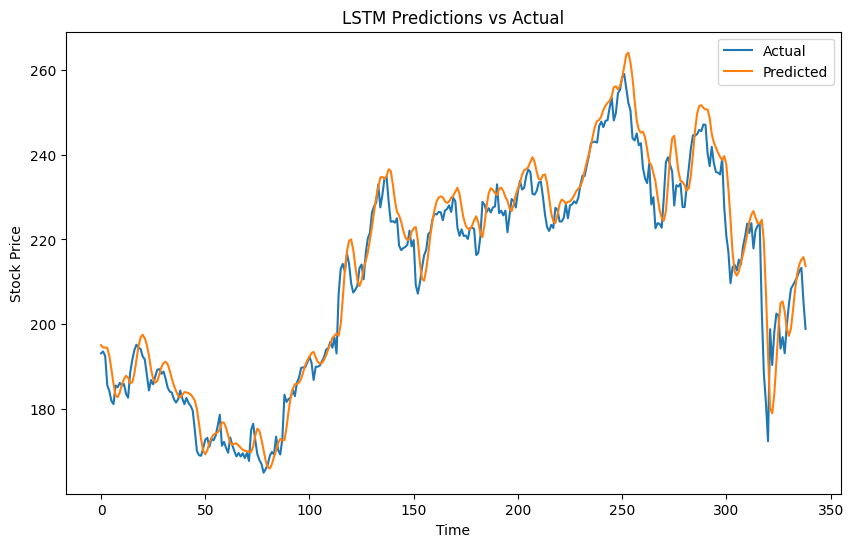

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [50]:
y_train_pred = model.predict(x_train)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [51]:
y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
print("Test RMSE:", rmse)


Test RMSE: 3.6443494991800645


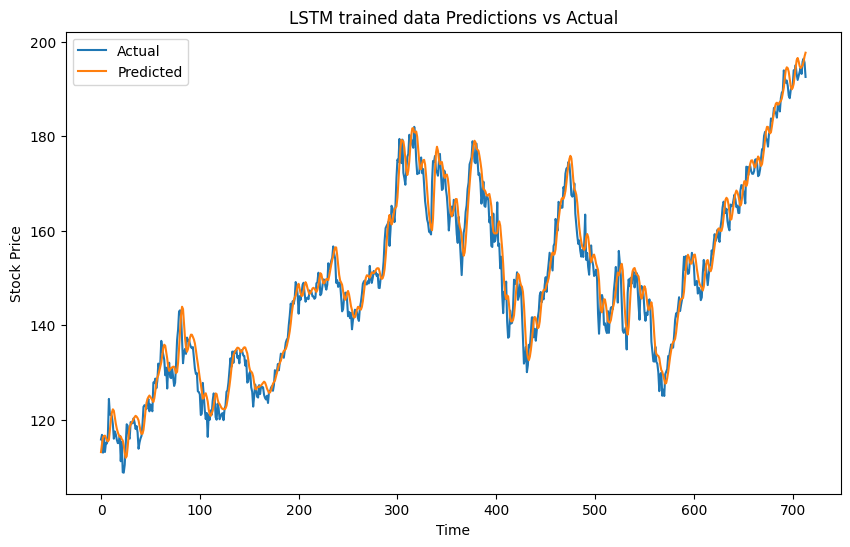

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_train_inv, label='Actual')
plt.plot(y_train_pred_inv, label='Predicted')
plt.title('LSTM trained data Predictions vs Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [92]:
Test_DS_scaled.shape

(440, 1)

In [93]:
len(Test_DS_scaled)

440

In [94]:
x_input=Test_DS_scaled[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [95]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [96]:
temp_input

[0.35298685034439575,
 0.34978083907326235,
 0.35346274264245453,
 0.353888541014402,
 0.3611772072636192,
 0.36728866624921724,
 0.3536881653099561,
 0.35804633688165305,
 0.3698184095178459,
 0.3717720726361929,
 0.3791108328115215,
 0.3811646837820913,
 0.3725735754539761,
 0.36408265497808384,
 0.3596242955541639,
 0.3431684408265497,
 0.341941139636819,
 0.3460488415779586,
 0.33906073888541016,
 0.34028804007514085,
 0.32563556668753907,
 0.3194990607388854,
 0.3166938008766436,
 0.32819035691922355,
 0.3041202254226674,
 0.3084283030682529,
 0.2900438321853474,
 0.29302442078897933,
 0.2925986224170319,
 0.2903944896681277,
 0.3081277395115842,
 0.32916718847839693,
 0.33192235441452717,
 0.3274890419536631,
 0.32350657482780204,
 0.3034940513462742,
 0.31549154664996865,
 0.3146649968691296,
 0.3165435190983093,
 0.30254226675015644,
 0.302592360676268,
 0.3150407013149655,
 0.3256856606136505,
 0.3373575453976205,
 0.3450469630557294,
 0.34472135253600494,
 0.34572323105823416

In [97]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.24081501]
101
1 day input [0.34978084 0.35346274 0.35388854 0.36117721 0.36728867 0.35368817
 0.35804634 0.36981841 0.37177207 0.37911083 0.38116468 0.37257358
 0.36408265 0.3596243  0.34316844 0.34194114 0.34604884 0.33906074
 0.34028804 0.32563557 0.31949906 0.3166938  0.32819036 0.30412023
 0.3084283  0.29004383 0.29302442 0.29259862 0.29039449 0.30812774
 0.32916719 0.33192235 0.32748904 0.32350657 0.30349405 0.31549155
 0.314665   0.31654352 0.30254227 0.30259236 0.3150407  0.32568566
 0.33735755 0.34504696 0.34472135 0.34572323 0.34812774 0.34742642
 0.3513087  0.35115842 0.33442705 0.32676268 0.338134   0.32859111
 0.32333125 0.32285535 0.32182843 0.33119599 0.30216656 0.28553538
 0.27586725 0.25758297 0.26712586 0.26840326 0.2651221  0.27150908
 0.26865373 0.27909831 0.28525986 0.29282405 0.28726362 0.29307451
 0.27817157 0.28876644 0.29142142 0.2931747  0.24132749 0.20423294
 0.18690044 0.16425798 0.23045711 0.20934252 0.22870382 0.23964934
 0.23869756 0.2189856  0.22577332

In [106]:
lst_output

[[0.24081501364707947],
 [0.2346455603837967],
 [0.23372328281402588],
 [0.2351909577846527],
 [0.23757976293563843],
 [0.24034245312213898],
 [0.24329115450382233],
 [0.2463354766368866],
 [0.24941280484199524],
 [0.2524837553501129],
 [0.2555352449417114],
 [0.25857725739479065],
 [0.26163527369499207],
 [0.264742374420166],
 [0.2679327428340912],
 [0.2712370753288269],
 [0.2746804654598236],
 [0.2782815396785736],
 [0.28205281496047974],
 [0.28600212931632996],
 [0.29013392329216003],
 [0.294450968503952],
 [0.2989557981491089],
 [0.30365195870399475],
 [0.3085446357727051],
 [0.3136415481567383],
 [0.3189530074596405],
 [0.32449206709861755],
 [0.3302745521068573],
 [0.3363187611103058]]

In [112]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [113]:
len(df2)

1255

In [114]:
df2

array([[310.13],
       [315.01],
       [311.41],
       ...,
       [205.35],
       [198.89],
       [198.51]])

In [115]:
future_preds = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))


In [116]:
actual_last_100 = df2[-100:]

In [117]:
actual_last_100.shape, future_preds.shape

((100, 1), (30, 1))

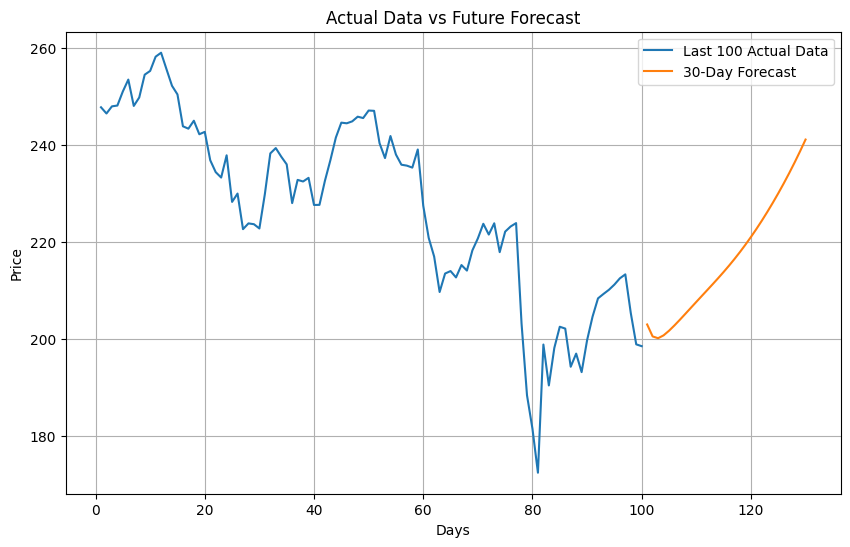

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(day_new, actual_last_100, label='Last 100 Actual Data')
plt.plot(day_pred, future_preds, label='30-Day Forecast')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Actual Data vs Future Forecast')
plt.legend()
plt.grid(True)
plt.show()
